/tmp/ipython-input-718462573.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


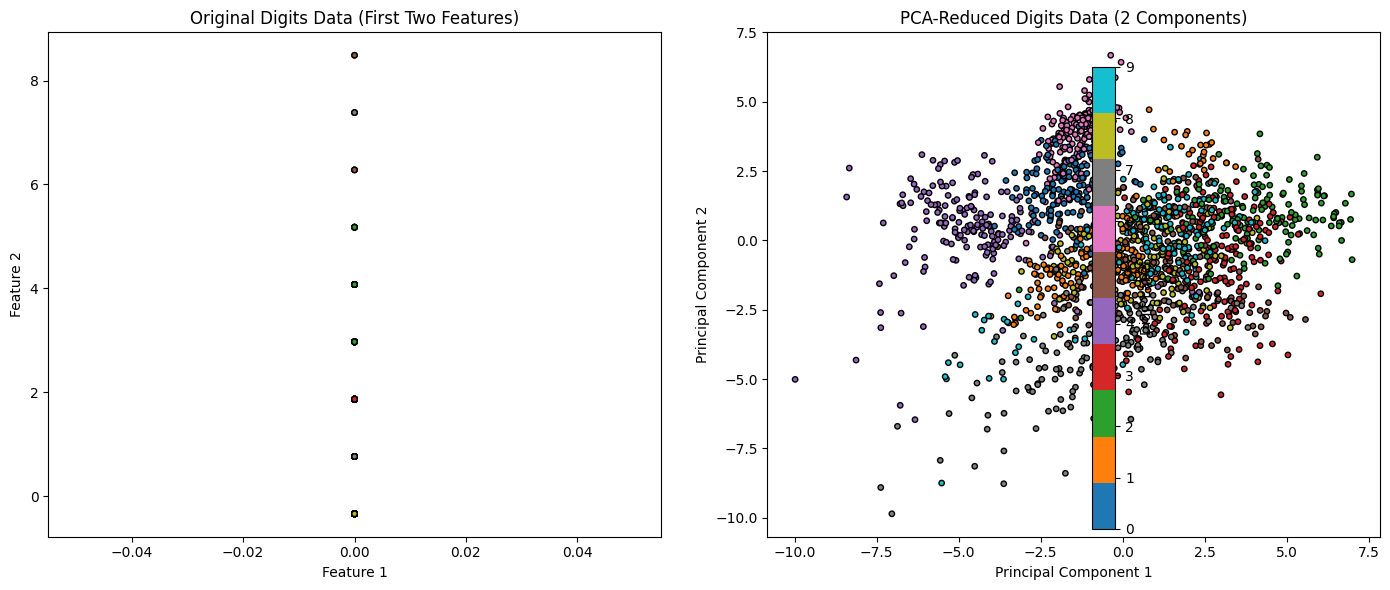

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Data
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Standardize Features
X_std = StandardScaler().fit_transform(X)

# Compute Covariance Matrix
cov_matrix = np.cov(X_std.T)

# Eigen Decomposition
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

# Select Top 2 Components
eigen_vec_indices = [i for _, i in sorted(zip(eigen_vals, range(len(eigen_vals))), reverse=True)[:2]]

# Project Data
X_pca = X_std.dot(eigen_vecs[:, eigen_vec_indices])

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original Data (first two standardized features)
scatter1 = axes[0].scatter(X_std[:, 0], X_std[:, 1], c=y, cmap=plt.cm.tab10, s=15, edgecolor='k')
axes[0].set_title("Original Digits Data (First Two Features)")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# PCA Reduced Data (two principal components)
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.tab10, s=15, edgecolor='k')
axes[1].set_title("PCA-Reduced Digits Data (2 Components)")
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")

# Add a shared legend
fig.colorbar(scatter2, ax=axes, orientation="vertical", label="Digit Label")

plt.tight_layout()
plt.show()

[[-1.91421366  0.95450157]
 [-0.58898033 -0.9246358 ]
 [-1.30203906  0.31718883]
 ...
 [-1.02259599  0.14791087]
 [-1.07605522  0.38090625]
 [ 1.25770233  2.22759088]] [[-1.91421366 -0.95450157]
 [-0.58898033  0.9246358 ]
 [-1.30203906 -0.31718883]
 ...
 [-1.02259599 -0.14791087]
 [-1.07605522 -0.38090625]
 [ 1.25770233 -2.22759088]]


/tmp/ipython-input-1074416146.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


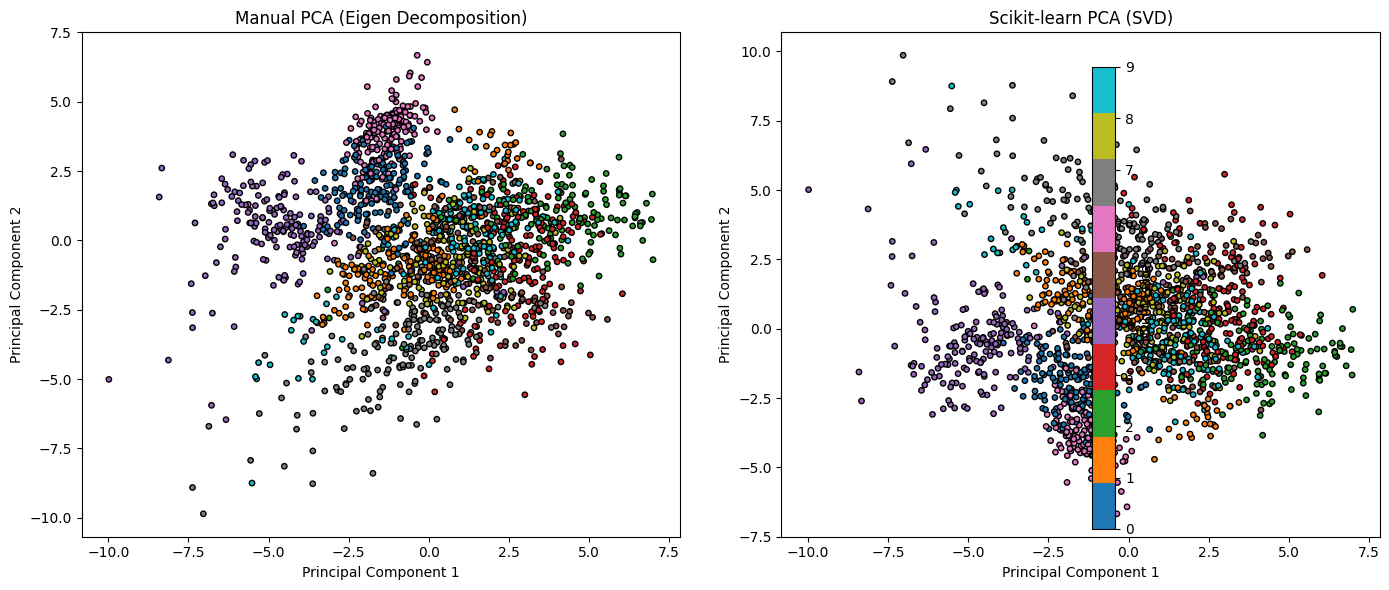

True True


In [4]:
# Compare with sklearn's PCA
pca = PCA(n_components=2)
X_sklearn_pca = pca.fit_transform(X_std)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Manual PCA Plot
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.tab10, s=15, edgecolor='k')
axes[0].set_title("Manual PCA (Eigen Decomposition)")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")

# Scikit-learn PCA Plot
scatter2 = axes[1].scatter(X_sklearn_pca[:, 0], X_sklearn_pca[:, 1], c=y, cmap=plt.cm.tab10, s=15, edgecolor='k')
axes[1].set_title("Scikit-learn PCA (SVD)")
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")

# Shared Colorbar
fig.colorbar(scatter2, ax=axes, orientation="vertical", label="Digit Label")

plt.tight_layout()
plt.show()

Both scatterplots show the digits dataset reduced to two dimensions, but scikit-learn's PCA uses a more numerically stable algorithm (SVD) compared to the manual Eigen decomposition. The plots look very similar, though they might differ by a reflection or rotation of axes because PCA directions are unique up to sign and orientation. In this case, they are reflections along the horizontal axis.

In [5]:
# This prints "True True". They have the same shape. The magnitudes are nearly identical; they might differ only in the sign of either or both of the dimensions.
print(X_pca.shape == X_sklearn_pca.shape, (abs(X_pca.round(7)) == abs(X_sklearn_pca.round(7))).all())

True True


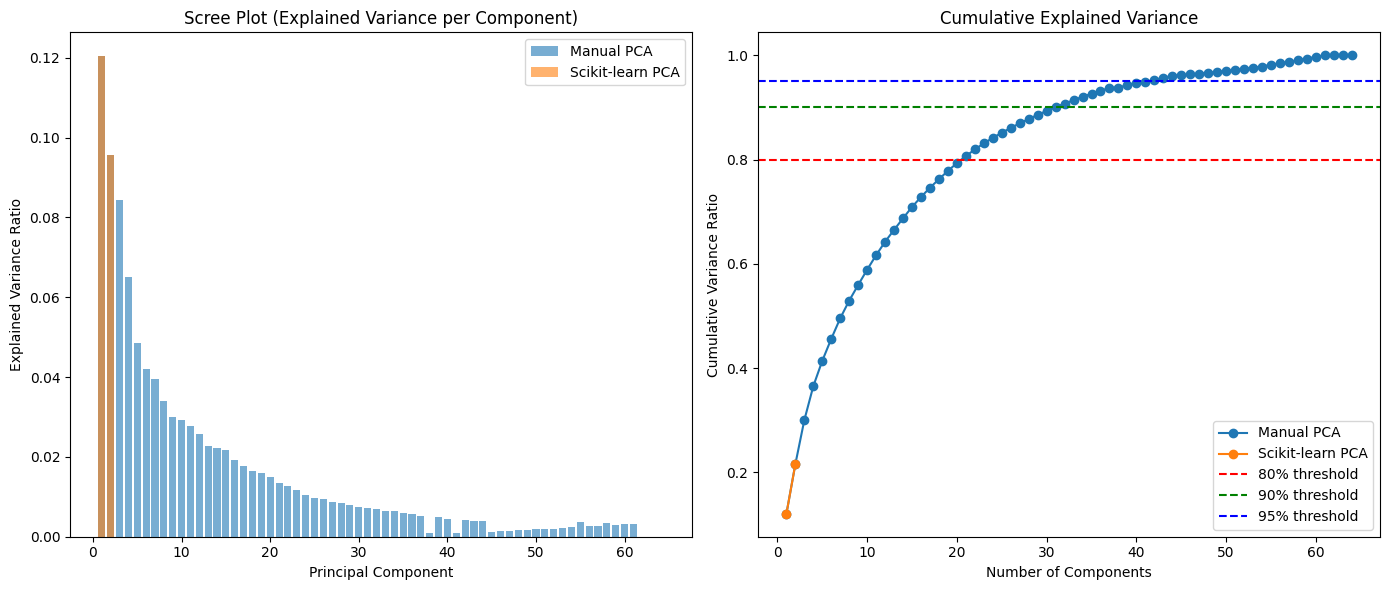

In [7]:
# --- Explained variance ratios ---
# Manual PCA (normalize eigenvalues)
manual_var_ratio = eigen_vals / np.sum(eigen_vals)

# Scikit-learn PCA
sklearn_var_ratio = pca.explained_variance_ratio_

# --- Cumulative variance ---
manual_cum_var = np.cumsum(manual_var_ratio)
sklearn_cum_var = np.cumsum(sklearn_var_ratio)

# --- Plotting ---
_, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scree plot (individual variance ratios)
axes[0].bar(range(1, len(manual_var_ratio)+1), manual_var_ratio,
            alpha=0.6, label="Manual PCA")
axes[0].bar(range(1, len(sklearn_var_ratio)+1), sklearn_var_ratio,
            alpha=0.6, label="Scikit-learn PCA")
axes[0].set_title("Scree Plot (Explained Variance per Component)")
axes[0].set_xlabel("Principal Component")
axes[0].set_ylabel("Explained Variance Ratio")
axes[0].legend()

# Cumulative variance plot
axes[1].plot(range(1, len(manual_cum_var)+1), manual_cum_var,
             marker='o', label="Manual PCA")
axes[1].plot(range(1, len(sklearn_cum_var)+1), sklearn_cum_var,
             marker='o', label="Scikit-learn PCA")
axes[1].axhline(y=0.8, color='r', linestyle='--', label="80% threshold")
axes[1].axhline(y=0.9, color='g', linestyle='--', label="90% threshold")
axes[1].axhline(y=0.95, color='b', linestyle='--', label="95% threshold")
axes[1].set_title("Cumulative Explained Variance")
axes[1].set_xlabel("Number of Components")
axes[1].set_ylabel("Cumulative Variance Ratio")
axes[1].legend()

plt.tight_layout()
plt.show()

**Scree plot**: Bars showing how much variance each component explains. The first few dominate, later ones contribute little.

**Cumulative variance plot**: Curves rising steeply then flattening, with horizontal lines at 80%, 90%, and 95% thresholds.

**Manual vs scikit-learn PCA**: Both overlap almost perfectly, confirming they capture the same variance distribution.

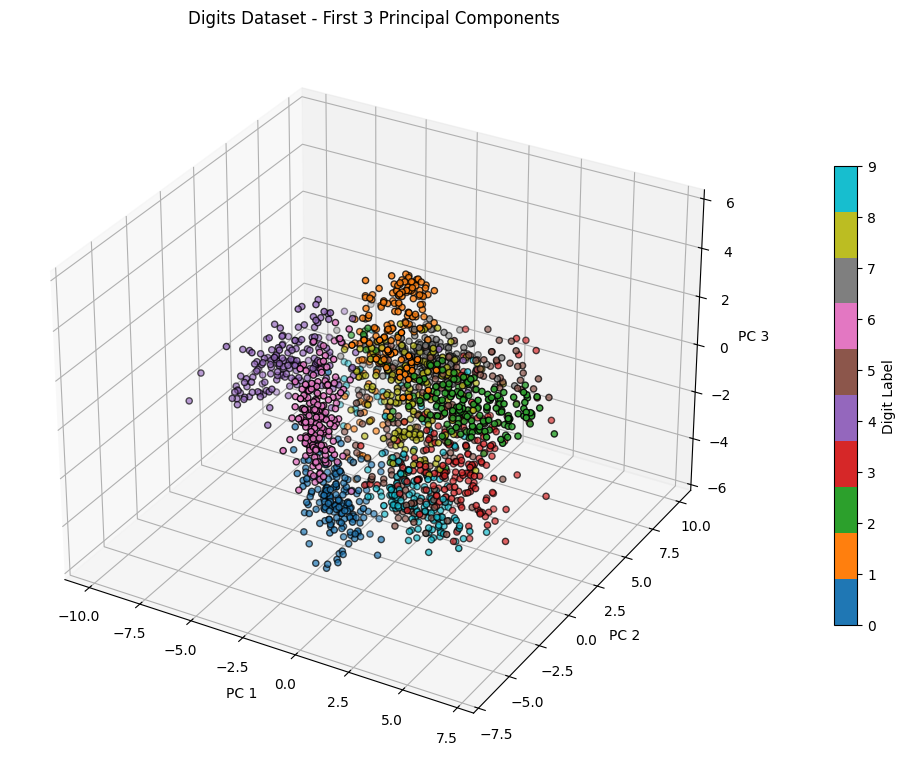

In [8]:
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

# Fit PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_std)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=y, cmap=plt.cm.tab10, s=20, edgecolor='k')

ax.set_title("Digits Dataset - First 3 Principal Components")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

# Add colorbar legend
legend = fig.colorbar(scatter, ax=ax, shrink=0.6, pad=0.1)
legend.set_label("Digit Label")

plt.tight_layout()
plt.show()